# CS301 - Intro to Data Science
## Lab 04 - Using Matplotlib for Data Manipulation
### Professor Connor Watson
### Based on notes provided by other online sources

In [1]:
import pandas as pd
import numpy as np


##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir = 'C:\\Users\\watson\\Documents\\CS301_Planning\\datasets\\'

In [3]:
# X_cols will be the independent variables
# Y_col is the dependent variable
X_cols = ['x1', 'x2']
Y_col = 'y'

In [4]:
df = pd.read_json(data_dir + 'toy.json')
df

,x1,x2,y
0,0,0,-1.0
1,0,1,-1.0
10,4,5,NaN
2,1,0,-1.0
3,1,1,-1.0
4,5,5,1.0
5,5,6,1.0
6,6,5,1.0
7,6,6,1.0
8,-2,0,NaN


In [5]:
# The row indeces are out of order, sort them:
df.sort_index(inplace=True)
df

,x1,x2,y
0,0,0,-1.0
1,0,1,-1.0
2,1,0,-1.0
3,1,1,-1.0
4,5,5,1.0
5,5,6,1.0
6,6,5,1.0
7,6,6,1.0
8,-2,0,NaN
9,10,0,NaN


* Remember for supervised learning, we know the class labels of some of our data
* We would like to learn the patterns of the data such that we can predict the values of new examples
* Let's separate the data into smaller DataFrames which have rows with only observations of a given class (or unknown)

In [6]:
c1 = df.loc[(df['y']==-1)]
c1_LR = c1.copy()
c1_LR['y'] = c1_LR['y'].replace(-1, 0)
c2 = df.loc[(df['y']==1)]
c3 = df.loc[(df['y'].isna())]

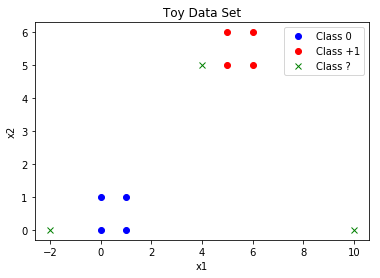

In [7]:
plt.plot(c1_LR['x1'], c1_LR['x2'], 'o', c='blue', label='Class 0')
plt.plot(c2['x1'], c2['x2'], 'o', c='red', label='Class +1')
plt.plot(c3['x1'], c3['x2'], 'x', c='green', label='Class ?')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Toy Data Set')
plt.legend()
plt.show()

* In the above visualization, we can see 4 points belonging to class 0, and 4 points belonging to class +1
* There are three points which we don't know the label, those are green crosses
* You can almost visualize in your head which class they should belong to
* Can we create a model which correctly predicts those values?
---------------------------------------------------------------------------------------------------------------
* Below, we manually make the train and test set. Although, it is acceptable to use train_test_split from sklearn.
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
train = pd.concat([c1_LR, c2])
X_train = train[X_cols]
Y_train = train[Y_col]
X_test = c3[X_cols]
Y_test = c3[Y_col]

* Let us first use a Logistic Regression model for prediction

In [11]:
from sklearn import linear_model
from scipy.special import expit

* From sklearn, you can import an object for the model of your choosing.
* Here, we are using LogisticRegression with a liblinear solver (linear equation)
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* "For small datasets, ‘liblinear’ is a good choice."
* The .fit() method will train the model so that it learns the patterns of our train set, including BOTH independent variables and dependent variables.

In [12]:
logreg = linear_model.LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

* The .predict() method takes in an array of test points, and outputs an array of predictions.
* Remember, our labels are 0 and 1. So the predictions of X_test (in order from top to bottom) are 0, 1, 1

In [13]:
X_test

,x1,x2
8,-2,0
9,10,0
10,4,5


In [14]:
predictions = logreg.predict(X_test)
predictions

array([0., 1., 1.])

In [15]:
predicted_points = X_test.copy()
predicted_points['y'] = predictions
predicted_points

,x1,x2,y
8,-2,0,0.0
9,10,0,1.0
10,4,5,1.0


* Below, we make a DataFrame which now has all the data, including the predicted points.

In [16]:
data = pd.concat([train, predicted_points])
data

,x1,x2,y
0,0,0,0.0
1,0,1,0.0
2,1,0,0.0
3,1,1,0.0
4,5,5,1.0
5,5,6,1.0
6,6,5,1.0
7,6,6,1.0
8,-2,0,0.0
9,10,0,1.0


* Now, we can plot the data and their predictions on a scatter plot. Do the predictions make sense?

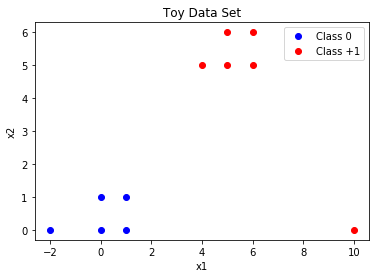

In [17]:
class0 = data.loc[(data['y']==0)]
class1 = data.loc[(data['y']==1)]
plt.plot(class0['x1'], class0['x2'], 'o', c='blue', label='Class 0')
plt.plot(class1['x1'], class1['x2'], 'o', c='red', label='Class +1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Toy Data Set')
plt.legend()
plt.show()

##### Exercise 1 - Given the DataFrame above called "data", think about predictions for the points in the below DataFrame. Do you think these are accurate? Then use the LogisticRegression model stored in the object "logreg" to make predictions.

* NOTE: You do not have to re-train the model. Use the already trained model "logreg" to predict the labels for the new points.

In [23]:
new_points = {
    'x1':[4,2,4,6,2,-2,-2,8],
    'x2':[4,3,3,0,5,5,2,3]
}

new_test_points = pd.DataFrame.from_dict(new_points, orient='columns')
new_test_points

,x1,x2
0,4,4
1,2,3
2,4,3
3,6,0
4,2,5
5,-2,5
6,-2,2
7,8,3


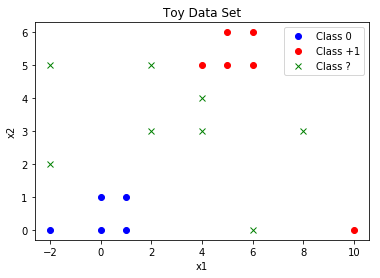

In [24]:
class0 = data.loc[(data['y']==0)]
class1 = data.loc[(data['y']==1)]
plt.plot(class0['x1'], class0['x2'], 'o', c='blue', label='Class 0')
plt.plot(class1['x1'], class1['x2'], 'o', c='red', label='Class +1')
plt.plot(new_test_points['x1'], new_test_points['x2'], 'x', c='green', label='Class ?')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Toy Data Set')
plt.legend()
plt.show()

* Now that we have trained a Logistic Regression model, let's compare the predictions to a Support Vector Machine model

In [25]:
from sklearn import svm

In [26]:
X = df.loc[(df['y'].isna() == False)]
X_train = X[['x1','x2']].values
Y_train = X[['y']].values
Y_train = Y_train.reshape((1, 8)).flatten()

In [27]:
X_train

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [5, 5],
       [5, 6],
       [6, 5],
       [6, 6]], dtype=int64)

In [28]:
Y_train

array([-1., -1., -1., -1.,  1.,  1.,  1.,  1.])

In [29]:
X_test = df.loc[(df['y'].isna())][['x1', 'x2']].values

In [30]:
X_test

array([[-2,  0],
       [10,  0],
       [ 4,  5]], dtype=int64)

* Here, we will train our Support Vector Machine model
* https://scikit-learn.org/stable/modules/svm.html
* SVC is Support Vector Classification
* You can use SVM for Regression, that would be SVR - Support Vector Regression
* Since we are looking at a linear model, pass kernel='model', 

In [31]:
model = svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

* Below is some interesting code to plot the Support Vector Machine including the margin

In [32]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 10)
yy = a * xx - (model.intercept_[0]) / w[1]

In [33]:
# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

In [34]:
predictions = model.predict(X_test)
print(predictions)

[-1.  1.  1.]


In [35]:
for i in range(8, 11):
    df.iloc[i, 2] = predictions[i-8]

In [36]:
df

,x1,x2,y
0,0,0,-1.0
1,0,1,-1.0
2,1,0,-1.0
3,1,1,-1.0
4,5,5,1.0
5,5,6,1.0
6,6,5,1.0
7,6,6,1.0
8,-2,0,-1.0
9,10,0,1.0


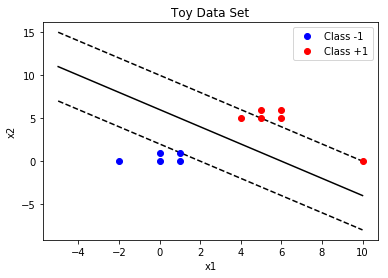

In [37]:
c1_ = df.loc[(df['y']==-1)]
c2_ = df.loc[(df['y']==1)]

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

#plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
#            facecolors='none', zorder=10, edgecolors='k')
#plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
#            edgecolors='k')


plt.plot(c1_['x1'], c1_['x2'], 'o', c='blue', label='Class -1')
plt.plot(c2_['x1'], c2_['x2'], 'o', c='red', label='Class +1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Toy Data Set')
plt.legend()
plt.show()

##### Exercise 2 - Can you use Support Vector Machine to predict the same values from Exercise 1? Do you get the same predictions?

* Finally, let's look at Linear Regression using a common use case - stocks analysis

In [39]:
tsla = pd.read_csv(data_dir + 'TSLA.csv')
tsla['Date'] = pd.to_datetime(tsla['Date'])
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [41]:
tsla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


* We want to convert the date column into something more usable and continuous
* We'll write a function that gets the number of days since the earliest date in the data set

In [42]:
def get_days_since(date, earliest_date):
    return (date.date() - earliest_date.date()).days

In [43]:
tsla['Num Days'] = tsla['Date'].apply(get_days_since, earliest_date=min(tsla['Date']))
tsla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Num Days
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,0
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,7
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,8
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400,9
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600,10
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500,13
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100,14


In [44]:
tsla.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Num Days
2406,2020-01-21,530.250000,548.580017,528.409973,547.200012,547.200012,17803500,3493
2407,2020-01-22,571.890015,594.500000,559.099976,569.559998,569.559998,31369000,3494
2408,2020-01-23,564.250000,582.000000,555.599976,572.200012,572.200012,19651000,3495
2409,2020-01-24,570.630005,573.859985,554.260010,564.820007,564.820007,14353600,3496
2410,2020-01-27,541.989990,564.440002,539.280029,558.020020,558.020020,13608100,3499
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,3500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,3501
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,3502
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,3503
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000,3506


* We want to predict the price that the stock will be at the end of day - this is 'Close'
* Close will be our dependent variable, and we can select a subset of other columns for the independent variables

In [45]:
X = tsla[['Open', 'Low', 'High', 'Volume', 'Num Days']]
Y = tsla['Close']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
from sklearn.linear_model import LinearRegression

In [47]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
linreg.coef_

array([-6.44853565e-01,  7.26997821e-01,  9.16245564e-01, -2.99913581e-08,
        7.83108526e-06])

* Below, we will predict the values over the X_test set

In [56]:
preds = linreg.predict(X_test)

* We can define our own functions which compute the different types of error for our model

In [57]:
def mean_absolute_error(labels, predictions):
    # average magnitude of the errors in a set of predictions (without direction)
    return 1/predictions.shape[0] * (((labels - predictions).abs()).sum())

In [58]:
def mean_squared_error(labels, predictions):
    # average squared differences between prediction and actual observation
    return 1/predictions.shape[0] * (((labels - predictions).pow(2)).sum())

In [59]:
def root_mean_squared_error(labels, predictions):
    return (1/predictions.shape[0] * (((labels - predictions).pow(2)).sum())) ** (0.5)

##### Exercise 3 - Compare the Mean Absolute Error to the other two types of error. What does this say about our model? Do you think it predicts well?

In [60]:
mean_absolute_error(Y_test, preds)

1.329448760847802

In [61]:
Y_test.head()

410      31.490000
199      24.650000
1670    279.760010
1934    328.200012
1036    259.320007
Name: Close, dtype: float64

In [63]:
preds[:5]

array([ 31.4590021 ,  24.54834631, 278.87914062, 330.61632347,
       262.05180343])

##### Exercise 4 - Make a new DataFrame which has the following layout:
* Columns = (Actual_Close, Predicted_Close, Residual)
* Remember the Residual is the absolute value of Actual - Prediction